## Prepare python environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
random_state = 5 # Use this to control randomness across runs e.g., dataset partitioning

## Preparing the Diabetes Dataset (2 points)

We will use the diabetes dataset from the UCI machine learning repository. Details about this dataset can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The objective of this project is to predict whether or not a female patient has diabetes based on diagnostic measurements in the dataset.

The dataset consists of several medical predictor variables (features) and one target variable indicating whether or not the person has diabetes. Predictor variables include the number of pregnancies the patient has had, glucose level, blood pressure, skin, insulin, bmi, pedigree, and age.

### Loading the dataset

In [3]:
# These are the names of the columns in the dataset. They includes all features of the data and the label.
col_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Download and load the dataset
import os
if not os.path.exists('diabetes.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364_2022/master/dataset/diabetes.csv 
diabetes_data = pd.read_csv('diabetes.csv', header=1, names=col_names)

FEATURE_NAMES=diabetes_data.drop('label',axis=1).columns

# Display the first five instances in the dataset
diabetes_data.head(5)

--2022-10-11 00:48:40--  https://raw.githubusercontent.com/JHA-Lab/ece364_2022/master/dataset/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24641 (24K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  24.06K  --.-KB/s    in 0.004s  

2022-10-11 00:48:41 (6.24 MB/s) - ‘diabetes.csv’ saved [24641/24641]



,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Check the type of data in each column
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  767 non-null    int64  
 1   glucose      767 non-null    int64  
 2   bp           767 non-null    int64  
 3   skin         767 non-null    int64  
 4   insulin      767 non-null    int64  
 5   bmi          767 non-null    float64
 6   pedigree     767 non-null    float64
 7   age          767 non-null    int64  
 8   label        767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Look at some statistics of the data using the `describe` function in pandas.

In [5]:
# Display some stats
diabetes_data.describe()

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


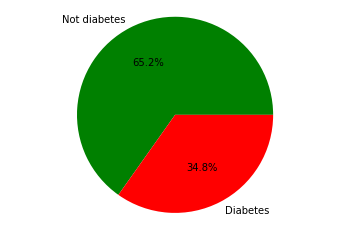

In [6]:
fig, ax = plt.subplots(1, 1)
ax.pie(diabetes_data.label.value_counts(),autopct='%1.1f%%', labels=['Not diabetes','Diabetes'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('');

### Extract target and descriptive features (1 point)

#### Separate the target and features from the data.

In [7]:
# Store all the features from the data in X
X = diabetes_data.drop('label', axis=1)

# Store all the target labels in y
y = diabetes_data['label']

In [8]:
# Convert data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

### Create training and validation datasets (0.5 points)

Split the data into training and validation set using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for validation.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

### Preprocess the dataset (0.5 points)

#### Preprocess the dataset by normalizing each feature to have zero mean and unit standard deviation. This can be done using `StandardScaler()` function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more details.

In [16]:
# Define the scaler for scaling the data
scaler = StandardScaler()

# Normalize the training data
X_train = scaler.fit_transform(X_train)

# Use the scaler defined above to standardize the validation data by applying the same transformation to the validation data.
X_val = scaler.transform(X_val)

## Training K-nearest neighbor models (18 points)



#### We will use the `sklearn` library to train a K-nearest neighbors (kNN) classifier. Review ch.5 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) for more details. 

### Exercise 1: Learning a kNN classifier (18 points)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

#### Exercise 1a: Evaluate the effect of the number of neighbors (6 points)

#### Train kNN classifiers with different number of neighbors among {1, 5, 15, 100, length(X_train)}.

#### Keep all other parameters at their default values.  

#### Report the model's accuracy on the training and validation sets.

In [17]:
for k in [1, 5, 15, 100, len(X_train)]:

    clf = KNeighborsClassifier(n_neighbors=k)

    # Train Classifer on training set
    clf = clf.fit(X_train,y_train)

    # Predict the response for training dataset
    y_pred_train = clf.predict(X_train)
    
    # Predict the response for validation dataset
    y_pred_val = clf.predict(X_val)

    print("# neighbors: %d"%k)
    print("training accuracy: %.2f" % accuracy_score(y_train, y_pred_train))
    print("validation accuracy: %.2f" % accuracy_score(y_val, y_pred_val))

# neighbors: 1
training accuracy: 1.00
validation accuracy: 0.73
# neighbors: 5
training accuracy: 0.83
validation accuracy: 0.71
# neighbors: 15
training accuracy: 0.79
validation accuracy: 0.71
# neighbors: 100
training accuracy: 0.76
validation accuracy: 0.73
# neighbors: 613
training accuracy: 0.66
validation accuracy: 0.61


#### Explain the effect of increasing the number of neighbors on the performance with the training and validation sets. 

Increasing $k$ reduces accuracy on the training dataset because the model relies on instances in addition to the point identical to the training query data point to make its classification. Increasing $k$ improves or maintains validation accuracy at low $k$ values due to better generalization but eventually reduces accuracy when $k$ becomes the entire dataset due to class imbalance. 

This could be due to the class imbalance and small size of the training dataset. This issue worsens with larger $k$, since more samples from the majority class contribute to the classification decision.

#### Exercise 1b: Evaluate the effect of a weighted kNN (6 points)

#### Train kNN classifiers with distance-weighting and vary the  number of neighbors among {1, 5, 15, 100, length(X_train)}.

#### Keep all other parameters at their default values.  

#### Report the model's accuracy on the training and validation sets.

In [13]:
for k in [1, 5, 15, 100, len(X_train)]:
  
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    # Train Classifer on training set
    clf = clf.fit(X_train,y_train)

    # Predict the response for training dataset
    y_pred_train = clf.predict(X_train)

    #Predict the response for validation dataset
    y_pred_val = clf.predict(X_val)

    print("# neighbors: %d"%k)
    print("training accuracy: %.2f" % accuracy_score(y_train, y_pred_train))
    print("validation accuracy: %.2f" % accuracy_score(y_val, y_pred_val))

# neighbors: 1
training accuracy: 1.00
validation accuracy: 0.73
# neighbors: 5
training accuracy: 1.00
validation accuracy: 0.71
# neighbors: 15
training accuracy: 1.00
validation accuracy: 0.73
# neighbors: 100
training accuracy: 1.00
validation accuracy: 0.75
# neighbors: 613
training accuracy: 1.00
validation accuracy: 0.61


#### Compare the effect of the number of neighbors on model performance (train and validation) under the distance-weighted kNN against the uniformly weighted kNN. Explain any differences observed.

Increasing $k$ has no impact on training performance i.e., training accuracy remains at 100% (as achieved when $k=1$). For any point in the training set, its nearest neighbors set includes itself, for which the distance is 0, resulting in infinite weight assigned to this point. Consequently, the classification decision is effectively based only on itself*, unlike the uniformly weighted kNN for which the classification decision is equally affected by itself and the remaining neighbors. 

Similar to the trends observed under the uniformly weighted kNN, increasing $k$ past a certain point can reduce validation accuracy, most likely due to the small size of the training dataset (see Ex 1b. solution). 

However, the validation performance is generally higher under the distance-weighted kNN than under the the uniformly weighted kNN. This is because under the distance-weighted kNN, data points distant from the query, especially points from a different class, have less impact on the classification decision. In particular, distance-weighting can help counter class imbalance effects by downweighting the contributions of training data points further away from the query that most likely belong to one of the majority classes.    

*In the scikit implementation, the weight for a training point with 0 distance is set to 1 and all other weights are set to 0.

#### Exercise 1c: Evaluate the effect of the power parameter in the Minkowski distance metric (6 points)

#### Train kNN classifiers with different distance functions by varying the power parameter for the Minkowski distance among {1, 2, 10, 100}.

#### Fix the number of neighbors to be 15, and use the uniformly-weighted kNN. Keep all other parameters at their default values.  
#### Report the model's accuracy over the validation set.

In [14]:
for p in [1, 2, 10, 100]:
    clf = KNeighborsClassifier(n_neighbors=15, weights='uniform', p=p)
    # Train Classifer on training set
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred_val = clf.predict(X_val)

    print("p: %d"%p)
    print("validation accuracy: %.2f" % accuracy_score(y_val, y_pred_val))

p: 1
validation accuracy: 0.75
p: 2
validation accuracy: 0.71
p: 10
validation accuracy: 0.75
p: 100
validation accuracy: 0.75


#### Explain any effect observed on the model performance upon increasing the power parameter. 

Increasing $p$ in this case does not change the validation set performance by much, with $p=1, 10, 100$ yielding the highest performance. 

Increasing $p$ amplifies larger differences between features relative to smaller differences between features. Consequently, the overall distance is affected more by features with larger differences, affecting the set of nearest neighbors. 

For this dataset, it seems that choosing neighbors based on differences across all features or features with larger differences both yield high performing classifiers.